In [2]:
!pip install tensorflow keras-cv matplotlib numpy


In [8]:
import json
import math
import keras_cv
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import losses
import numpy as np
from keras import metrics
import matplotlib.pyplot as plt


In [13]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2024-12-22 20:51:12--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
171.64.68.10sion.stanford.edu (vision.stanford.edu)... 
connected. to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... 
200 OKequest sent, awaiting response... 
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  9.97MB/s    in 75s     

2024-12-22 20:52:29 (10.1 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [16]:
!tar -xvf images.tar

Images/
Images/n02085620-Chihuahua/
Images/n02085620-Chihuahua/n02085620_10621.jpg
Images/n02085620-Chihuahua/n02085620_10976.jpg
Images/n02085620-Chihuahua/n02085620_11238.jpg
Images/n02085620-Chihuahua/n02085620_11258.jpg
Images/n02085620-Chihuahua/n02085620_11337.jpg
Images/n02085620-Chihuahua/n02085620_1152.jpg
Images/n02085620-Chihuahua/n02085620_11696.jpg
Images/n02085620-Chihuahua/n02085620_11818.jpg
Images/n02085620-Chihuahua/n02085620_11948.jpg
Images/n02085620-Chihuahua/n02085620_1205.jpg
Images/n02085620-Chihuahua/n02085620_12334.jpg
Images/n02085620-Chihuahua/n02085620_1235.jpg
Images/n02085620-Chihuahua/n02085620_1298.jpg
Images/n02085620-Chihuahua/n02085620_13151.jpg
Images/n02085620-Chihuahua/n02085620_1321.jpg
Images/n02085620-Chihuahua/n02085620_13383.jpg
Images/n02085620-Chihuahua/n02085620_1346.jpg
Images/n02085620-Chihuahua/n02085620_14413.jpg
Images/n02085620-Chihuahua/n02085620_14516.jpg
Images/n02085620-Chihuahua/n02085620_1455.jpg
Images/n02085620-Chihuahua/n020

In [20]:
ls


'computer vision 1 classification.ipynb'   Images1/             Untitled.ipynb
'Fine_tuning 2.ipynb'                      images.tar
 images/                                   lions_cheetahs.zip


In [23]:
# !ls Images1
!ls -d Images1/*/ | wc -l

120


In [45]:
import tensorflow as tf

# Load the dataset
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    'Images1', 
    image_size=(224, 224),  # Resize images to 224x224
    validation_split=0.3,   # 30% for validation
    subset='both',          # Get both train and validation sets
    seed=123,               # Seed for reproducibility
    label_mode='int',       # Can be 'int', 'categorical', or 'binary'
    batch_size=32           # Number of images per batch
)

# Inspect the datasets
print(f"Training Dataset: {train_ds}")
print(f"Validation Dataset: {val_ds}")


Found 20582 files belonging to 120 classes.
Using 14408 files for training.
Using 6174 files for validation.
Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [46]:
train_ds = train_ds.shuffle(10 * 16, reshuffle_each_iteration=True)  # Buffer size reduced to 160

In [47]:
for batch in train_ds.take(10):
    Images1, labels = batch
    print(images.shape)  # Should be (batch_size, height, width, channels)
    print(images.dtype)  # Should be a numeric data type (e.g., float32)
    print(images.shape)  # Verify label structure


(16, 224, 224, 3)
<dtype: 'float32'>
(16, 224, 224, 3)
(16, 224, 224, 3)
<dtype: 'float32'>
(16, 224, 224, 3)
(16, 224, 224, 3)
<dtype: 'float32'>
(16, 224, 224, 3)
(16, 224, 224, 3)
<dtype: 'float32'>
(16, 224, 224, 3)
(16, 224, 224, 3)
<dtype: 'float32'>
(16, 224, 224, 3)
(16, 224, 224, 3)
<dtype: 'float32'>
(16, 224, 224, 3)
(16, 224, 224, 3)
<dtype: 'float32'>
(16, 224, 224, 3)
(16, 224, 224, 3)
<dtype: 'float32'>
(16, 224, 224, 3)
(16, 224, 224, 3)
<dtype: 'float32'>
(16, 224, 224, 3)
(16, 224, 224, 3)
<dtype: 'float32'>
(16, 224, 224, 3)


(32, 224, 224, 3)


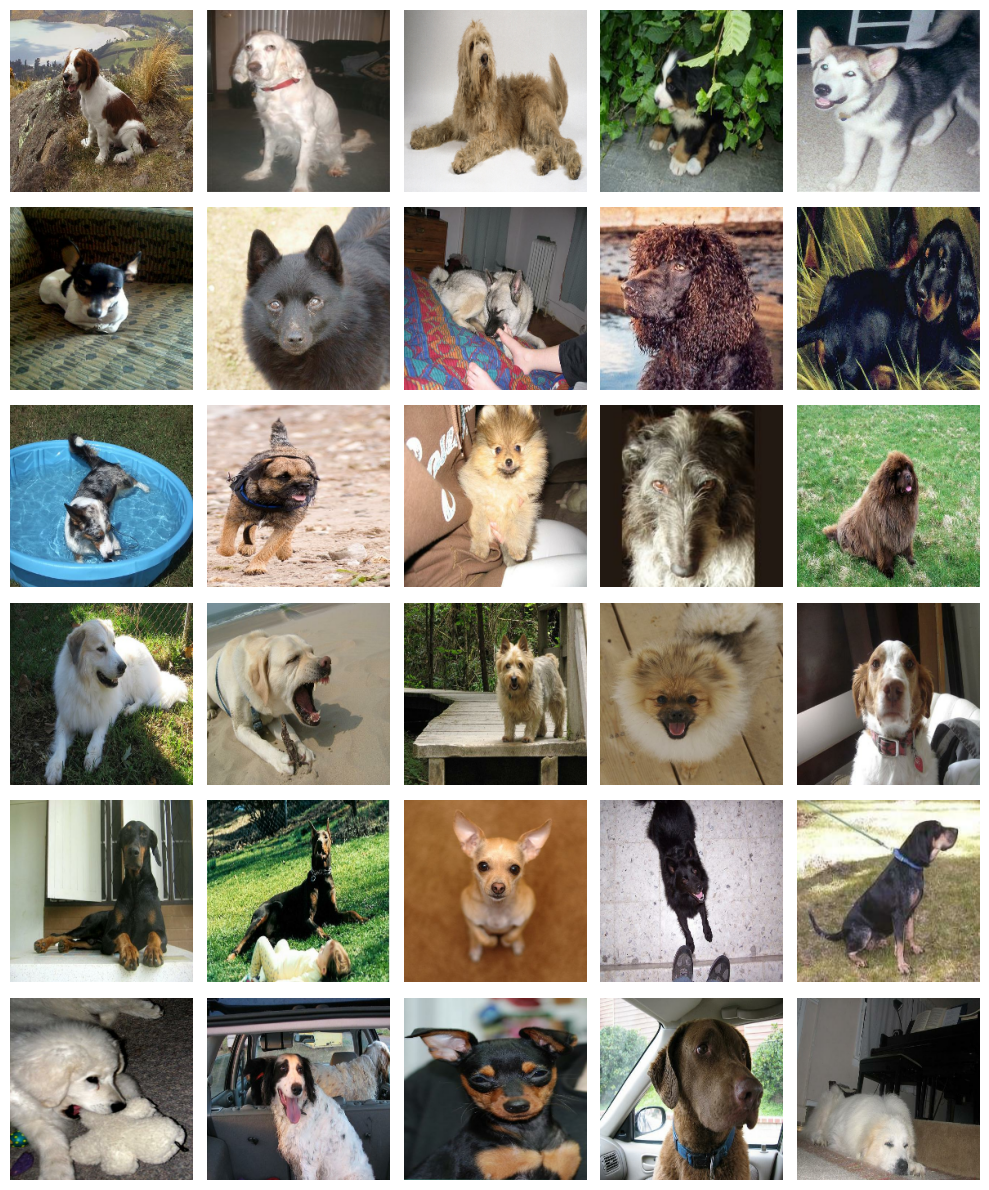

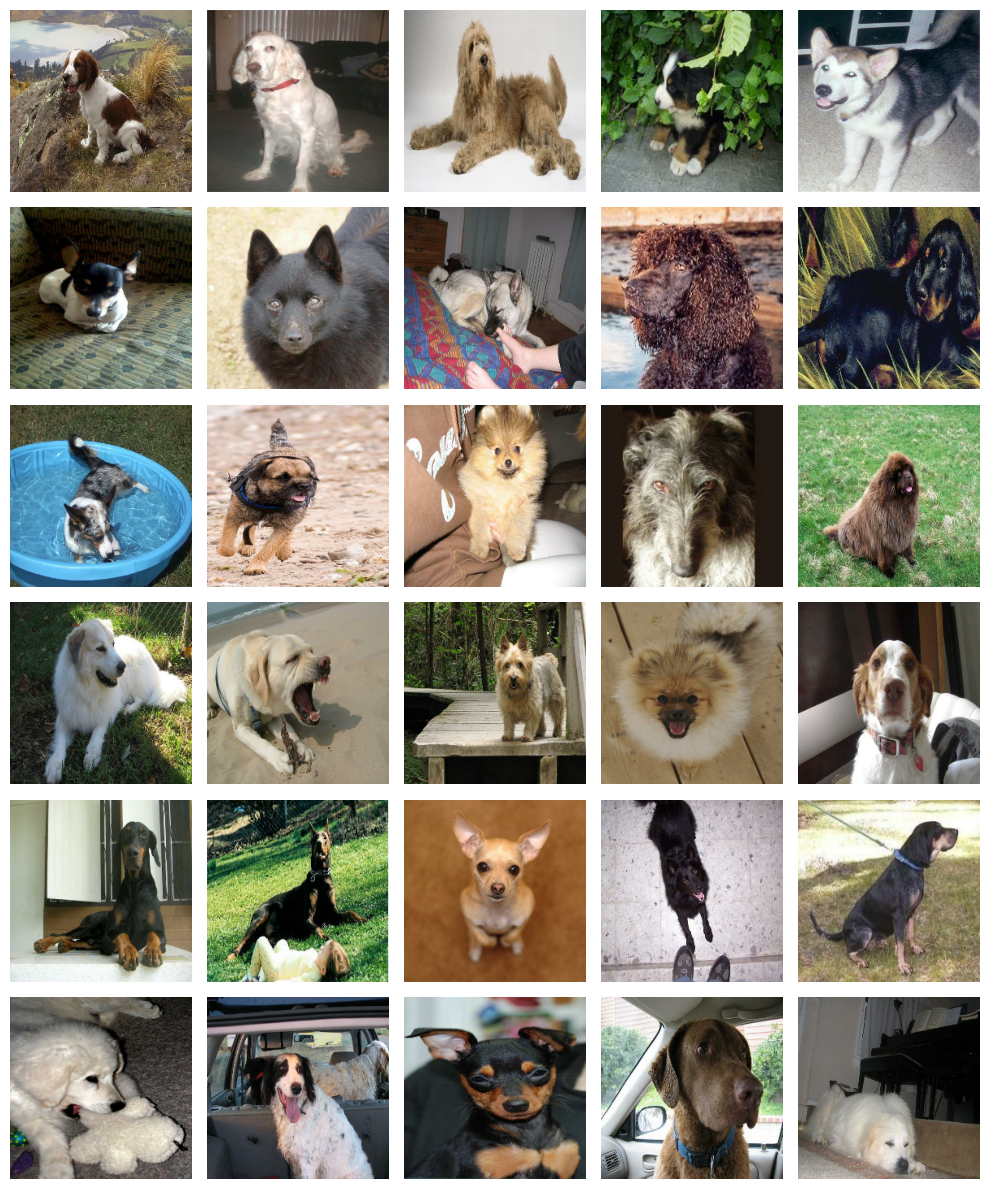

In [48]:
images = next(iter(train_ds.take(1)))[0]
print(images.shape)
keras_cv.visualization.plot_image_gallery(images, value_range=(0, 255))

In [55]:
model = keras_cv.models.ImageClassifier.from_preset("efficientnetv2_b0_imagenet", num_classes=120)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.AdamW(),
    metrics=['accuracy'],
)

In [56]:
r = model.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=10
)

Epoch 1/10


2024-12-22 21:54:18.937386: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27892', 20 bytes spill stores, 20 bytes spill loads

2024-12-22 21:54:19.494557: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27892', 224 bytes spill stores, 224 bytes spill loads



308/451 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.3721 - loss: 2.8337

2024-12-22 21:55:53.302249: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_fusion', 312 bytes spill stores, 312 bytes spill loads



451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.4209 - loss: 2.5141 

2024-12-22 21:56:19.997551: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2544', 196 bytes spill stores, 196 bytes spill loads



451/451 ━━━━━━━━━━━━━━━━━━━━ 155s 218ms/step - accuracy: 0.4212 - loss: 2.5124 - val_accuracy: 0.6929 - val_loss: 0.9718
Epoch 2/10
  1/451 ━━━━━━━━━━━━━━━━━━━━ 7:12 960ms/step - accuracy: 0.7188 - loss: 0.8047

2024-12-22 21:56:27.600050: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 128ms/step - accuracy: 0.7348 - loss: 0.8497 - val_accuracy: 0.7012 - val_loss: 0.9772
Epoch 3/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 127ms/step - accuracy: 0.8187 - loss: 0.5789 - val_accuracy: 0.7374 - val_loss: 0.8661
Epoch 4/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 128ms/step - accuracy: 0.8672 - loss: 0.4155 - val_accuracy: 0.7180 - val_loss: 0.9736
Epoch 5/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 127ms/step - accuracy: 0.8969 - loss: 0.3121 - val_accuracy: 0.7204 - val_loss: 1.0592
Epoch 6/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 127ms/step - accuracy: 0.9188 - loss: 0.2570 - val_accuracy: 0.7209 - val_loss: 1.0553
Epoch 7/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 127ms/step - accuracy: 0.9367 - loss: 0.2053 - val_accuracy: 0.7298 - val_loss: 1.0510
Epoch 8/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 128ms/step - accuracy: 0.9494 - loss: 0.1686 - val_accuracy: 0.7166 - val_loss: 1.1591
Epoch 9/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 58s 128ms/step - accuracy: 0.9473 - loss: 0.1682 - val

In [57]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy with EfficientNetV2: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.0000e+00 - loss: 5.0222
Test accuracy with EfficientNetV2: 0.00%
